<a href="https://colab.research.google.com/github/metaute73/Proyecto-Gen-mica-2024-2/blob/main/longitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


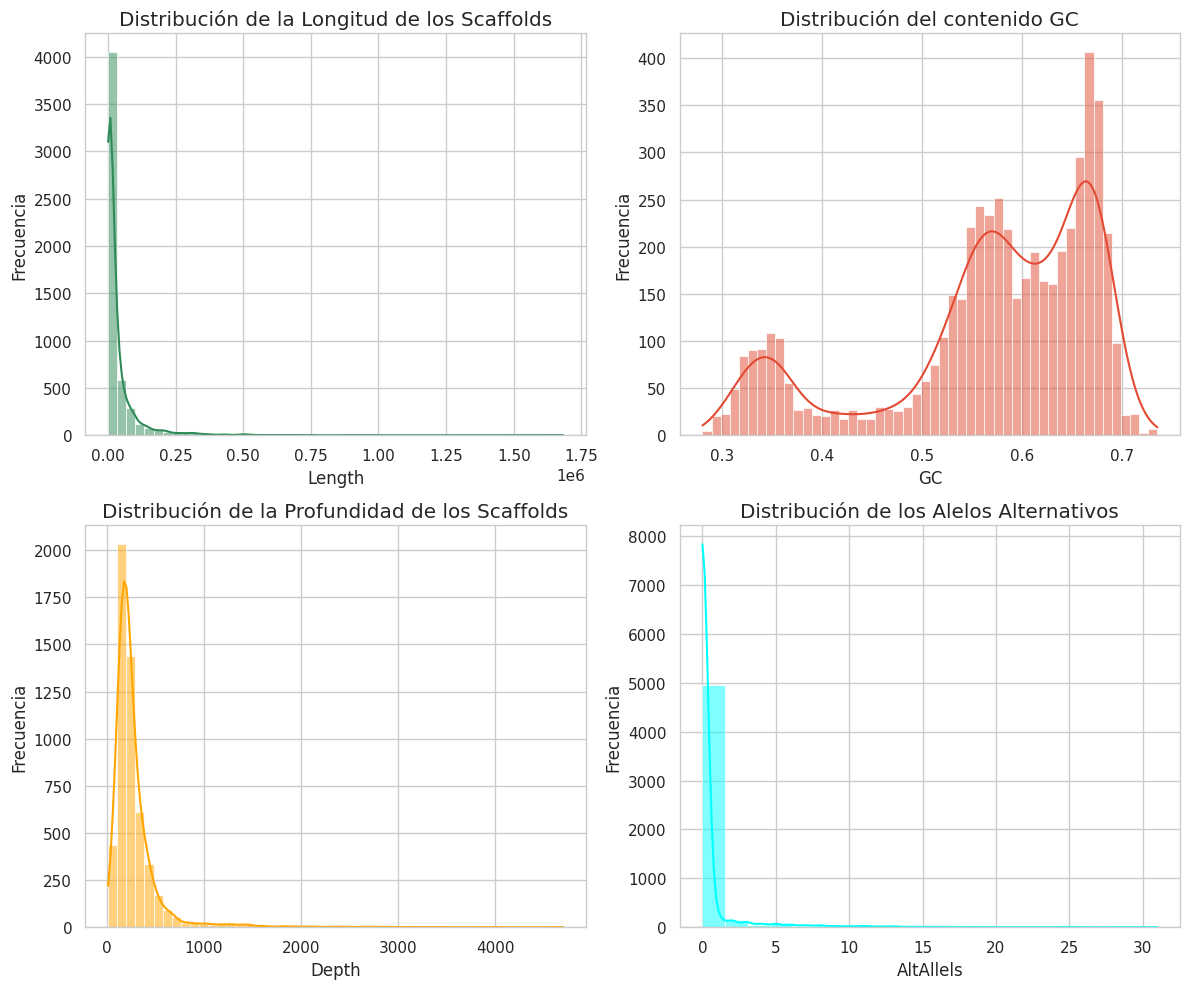

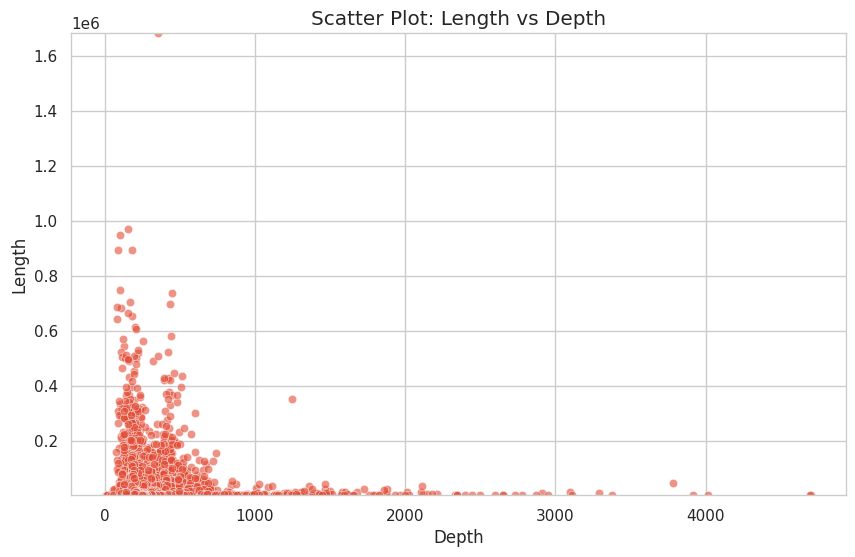

🔢 Suma total de Length en todas las configuraciones: 190926448.0
⚠️ Se superan los 9 millones, posible presencia de múltiples bacterias.

🚨 Archivos con más de 8 millones (posible presencia de más de 2 bacterias):
  - LengthDepth_13 (suma de Length: 8383707.0)
  - LengthDepth_33 (suma de Length: 10632395.0)
  - LengthDepth_36 (suma de Length: 8858154.0)

📂 Archivos con más de 6 millones (posible presencia de 2 bacterias):
  - LengthDepth_2 (suma de Length: 7044536.0)
  - LengthDepth_3 (suma de Length: 6924535.0)
  - LengthDepth_4 (suma de Length: 6739166.0)
  - LengthDepth_5 (suma de Length: 7011501.0)
  - LengthDepth_6 (suma de Length: 6954741.0)
  - LengthDepth_7 (suma de Length: 6942289.0)
  - LengthDepth_8 (suma de Length: 6737730.0)
  - LengthDepth_9 (suma de Length: 6203530.0)
  - LengthDepth_10 (suma de Length: 6143246.0)
  - LengthDepth_11 (suma de Length: 6184920.0)
  - LengthDepth_14 (suma de Length: 6711612.0)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
plt.style.use('ggplot')
sns.set_style("whitegrid")

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base (ajustar si es necesario)
ruta_base = "/content/drive/My Drive/Python/Procesamiento-Genomica-22-28/"

# Listas para almacenar datos
dataframes = []
sumas_length = {}  # Diccionario para almacenar la suma de Length por archivo
archivos_6m = []   # Archivos con más de 6 millones (posible 2 bacterias)
archivos_8m = []   # Archivos con más de 8 millones (posible más de 2 bacterias)

# Cargar archivos LengthDepth_1.csv hasta LengthDepth_36.csv
for i in range(1, 37):
    archivo = f"{ruta_base}LengthDepth_{i}.csv"

    try:
        df = pd.read_csv(archivo, delimiter="\t")

        # Verificar si la columna 'Length' existe
        if 'Length' in df.columns:
            suma_length = df['Length'].sum()  # Sumar la columna 'Length'
            sumas_length[f'LengthDepth_{i}'] = suma_length

            # Clasificar los archivos según su suma de Length
            if suma_length > 8_000_000:
                archivos_8m.append(f'LengthDepth_{i}')
            elif suma_length > 6_000_000:
                archivos_6m.append(f'LengthDepth_{i}')

            # Filtrar datos (Longitud mínima y valores atípicos)
            df = df[df['Length'] >= 1000]
            umbral = df['Depth'].mean() + df['Depth'].std() * 3
            df = df[df['Depth'] <= umbral]

            # Agregar el DataFrame procesado
            dataframes.append(df)

    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

# Concatenar todos los DataFrames
if dataframes:
    df_total = pd.concat(dataframes, ignore_index=True)
else:
    raise ValueError("No se encontraron archivos válidos.")

# Filtrar hasta 9 millones
df_total = df_total[df_total["Length"] <= 9_000_000]

# Graficar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df_total["Length"], bins=50, kde=True, color="seagreen", ax=axes[0, 0], stat="count")
axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")
axes[0, 0].set_ylabel("Frecuencia")  # Etiqueta correcta del eje Y

sns.histplot(df_total["GC"], bins=50, kde=True, ax=axes[0, 1], stat="count")
axes[0, 1].set_title("Distribución del contenido GC")
axes[0, 1].set_ylabel("Frecuencia")

sns.histplot(df_total["Depth"], bins=50, kde=True, color="orange", ax=axes[1, 0], stat="count")
axes[1, 0].set_title("Distribución de la Profundidad de los Scaffolds")
axes[1, 0].set_ylabel("Frecuencia")

sns.histplot(df_total["AltAllels"], bins=20, kde=True, color="cyan", ax=axes[1, 1], stat="count")
axes[1, 1].set_title("Distribución de los Alelos Alternativos")
axes[1, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Graficar Length vs Depth (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth', y='Length', data=df_total, alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Length')
plt.title('Scatter Plot: Length vs Depth')

# Ajustar los límites del eje Y si es necesario
plt.ylim(df_total["Length"].min(), df_total["Length"].max())

plt.show()

# Calcular la suma total de Length
suma_total_length = sum(sumas_length.values())

# Imprimir la suma total
print("🔢 Suma total de Length en todas las configuraciones:", suma_total_length)

# Verificar si se superan los 6 millones o 8 millones
if suma_total_length > 9_000_000:
    print("⚠️ Se superan los 9 millones, posible presencia de múltiples bacterias.")
elif suma_total_length > 6_000_000:
    print("⚠️ Se superan los 6 millones, posible presencia de al menos 2 bacterias.")
else:
    print("✅ No se superan los 6 millones, es probable que haya una sola bacteria.")

# Mostrar archivos que superan los umbrales
if archivos_8m:
    print("\n🚨 Archivos con más de 8 millones (posible presencia de más de 2 bacterias):")
    for archivo in archivos_8m:
        print(f"  - {archivo} (suma de Length: {sumas_length[archivo]})")

if archivos_6m:
    print("\n📂 Archivos con más de 6 millones (posible presencia de 2 bacterias):")
    for archivo in archivos_6m:
        print(f"  - {archivo} (suma de Length: {sumas_length[archivo]})")

if not archivos_6m and not archivos_8m:
    print("\n✅ Ningún archivo individual supera los 6 millones de Length.")
